In [1]:
# Libraries Sympy and Numpy
from sympy import*
import numpy as np

# To define automatic printing mode (Not needed anymore)
# init_printing()

# For priting with text
from IPython.display import display, Latex

# Plotting Libraries
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#interactive plotting in separate window
#%matplotlib qt 

#normal charts inside notebooks
#%matplotlib inline 

# Use Latex in plots
plt.rcParams['text.usetex'] = False

# 1. IPT System Frequency Splitting Model

- Equations Derivation

In [30]:
# Definition of the symbolic variables

# Resistances --> Coils and Load
R_1, R_2, R_L = symbols('R_1, R_2, R_L',
                       real = True)

# Inductance and Capacitance
C_1, C_2, L_1, L_2, M_i = symbols('C_1, C_2, L_1,L_2, M_i', 
                                 real = True)

# Reactance
X_1, X_2 = symbols('X_1, X_2',
                       real = True)

# Angular frequency
w_e = symbols('w_e', real = True)

# Input Voltage and Current
V_1, I_1 = symbols('V_1, I_1', real = True)

In [30]:
# Reactance in each mesh
#X_1 = (w_e*L_1) - (1/(w_e*C_1))
#X_2 = (w_e*L_2) - (1/(w_e*C_2))

- Equivalent Circuit's Matrix Representation: $[Z][I] = [V]$

In [31]:
# Impedance Matriz [Z]
Z_m = Matrix([[R_1 + (I*X_1), I*w_e*M_i],
            [I*w_e*M_i, R_2 + R_L + (I*X_2)]])

# Voltage Vector
V_m = Matrix([[V_1], [0]])

In [32]:
# Solve the System of Equations
I_m = Z_m.inv()*V_m

In [33]:
# Input Current
result_I = "Input Current: \n $${} = {}$$".format(latex(I_1), 
                                                 latex(I_m[0]))
display(Latex(result_I))

# Separate Numerator and denominator of I1
I_1_n, I_1_d = fraction(I_m[0])

<IPython.core.display.Latex object>

In [34]:
# Operate separately each polynomial
display(factor(I_1_n))
display(factor(I_1_d + (I*(M_i**2)*(w_e**2))))

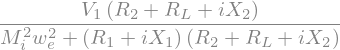

In [35]:
# Reconstruct the factored result
I_1 = (factor(I_1_n))/(factor(I_1_d + (I*(M_i**2)*(w_e**2))) 
                       - (I*(M_i**2)*(w_e**2)))
display(simplify(I_1))

- Input Impedance Expression $Z_{in}$:

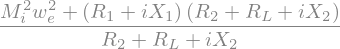

In [38]:
Z_in = V_1*(1/simplify(I_1))
display(Z_in)

- Freq. Splitting occurs when $\Im(Z_{in}) = 0$

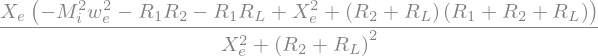

In [44]:
# Assume both reactance are equal for simplicity
# Common reactance X_e
X_e = symbols('X_e', real = True)

# Substitute the variable
Z_in = Z_in.subs([(X_1, X_e), (X_2, X_e)])

# Imaginary part of Zin
simplify(im(Z_in))

In [45]:
# Operate separately
factor(-(R_1*R_2) - (R_1*R_L) + ((R_2 + R_L)*(R_1 + R_2 + R_L)))

- Condition to only have one non-trivial root: $\Delta < 0$

In [2]:
# Angular Resonance frequency (central)
w_c = 2*np.pi*(800e3)  # 800 kHz

# Assume coils' self-inductance equal [H]
L_c = 53.49e-6

# Frequency-dependent parameter
beta_c = (w_c*L_c)**2

In [3]:
# Formula for condition Delta
Delta_c = lambda R, beta, k: (((R**2) - (2*beta))**2) - (4*(beta**2)*(1 - (k**2)))

# Inductive Coupling Coefficient Range k_i
k_i = np.arange(0, 1 + 0.01, 0.01)
print(k_i.shape)
print(k_i[-1])

# Load Resistance [ohms]
R_L = np.arange(1., 1000. + 1., 1.)
print(R_L.shape)
print(R_L[-1])

# Create a mesh
k_i_m, R_L_m = np.meshgrid(k_i, R_L)

# Calculate the function Delta
f_delta = Delta_c(R_L_m, beta_c, k_i_m)
print(f_delta.shape)

(101,)
1.0
(1000,)
1000.0
(1000, 101)


In [4]:
print(k_i_m)
print(k_i_m.shape)
print(R_L_m)
print(R_L_m.shape)

[[0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]
(1000, 101)
[[   1.    1.    1. ...    1.    1.    1.]
 [   2.    2.    2. ...    2.    2.    2.]
 [   3.    3.    3. ...    3.    3.    3.]
 ...
 [ 998.  998.  998. ...  998.  998.  998.]
 [ 999.  999.  999. ...  999.  999.  999.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]]
(1000, 101)


In [5]:
# Only the negative part of the function is useful

# Find the indixes of f_delta < 0
ind_fd = np.where(f_delta < 0)
print(ind_fd)
print(ind_fd[0].shape)
print(ind_fd[1].shape)

# Keep the negative values only
f_neg = f_delta[ind_fd[0], ind_fd[1]]
print(f_neg)
print(f_neg.shape)

(array([  0,   1,   2, ..., 536, 536, 536]), array([ 0,  0,  0, ...,  8,  9, 10]))
(36105,)
(36105,)
[  -289163.44884109  -1156641.79536819  -2602399.0395813  ...
 -95597061.68587494 -60060228.33427429 -20342591.05895996]
(36105,)


In [6]:
# A new grid is necessary
RL_n = R_L[ind_fd[0]]
print(RL_n)

ki_n = k_i[ind_fd[1]]
print(ki_n)

# Create new mesh
kin_m, RLn_m = np.meshgrid(ki_n, RL_n)

print(kin_m.shape)
print(RLn_m.shape)

# Check right selection
#print()

[  1.   2.   3. ... 537. 537. 537.]
[0.   0.   0.   ... 0.08 0.09 0.1 ]
(36105, 36105)
(36105, 36105)


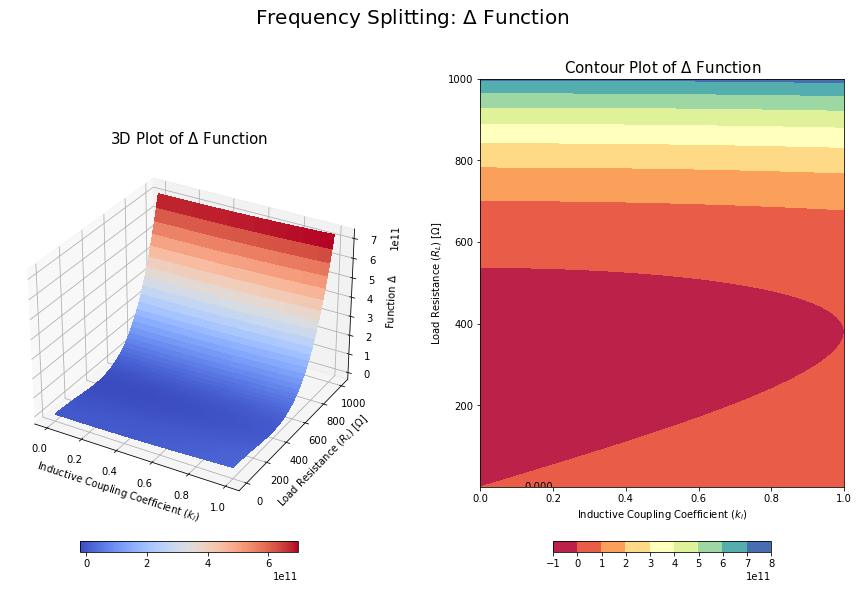

In [92]:
#interactive plotting in separate window
#%matplotlib qt 

#normal charts inside notebooks
%matplotlib inline 

# Set the plot --> size(width, height)
fig = plt.figure(figsize=(15,10))

################
# 1st Subplot
################

# Set the subplot for the two graphs
axs = fig.add_subplot(1, 2, 1, projection = '3d')

# Complete figure information
fig.suptitle('Frequency Splitting: $\Delta$ Function', fontsize = 20)

# For a simple 3D plot
#ax = fig.gca(projection = '3d')

# Axis labels
axs.set_xlabel('Inductive Coupling Coefficient ($k_{i}$)')
axs.set_ylabel('Load Resistance ($R_{L}$) [$\Omega$]')
axs.set_zlabel('Function $\Delta$')

# Title
axs.set_title('3D Plot of $\Delta$ Function', fontsize = 15)

# Plot the surface
surf = axs.plot_surface(k_i_m, R_L_m, f_delta, cmap = cm.coolwarm,
                      linewidth = 0, antialiased = False)

# Figure size (single plot)
#plt.rcParams["figure.figsize"] = (30,30)

# Add a color bar which maps values to colors.
plt.colorbar(surf, orientation = 'horizontal', shrink=0.6,
             aspect=20, pad = 0.05)

################
# 2nd Subplot
################

# Set the subplot for the two graphs
axs = fig.add_subplot(1, 2, 2)

# Plot the contour plot
cp = plt.contourf(k_i_m, R_L_m, f_delta, cmap = cm.Spectral)

# Define the levels to label
c_labels = [0.e0]
axs.clabel(cp, c_labels, inline = 1, colors = 'k', fmt = '%1.3f', fontsize = 10)

# Color bar
plt.colorbar(cp, orientation = 'horizontal', shrink=0.6,
             aspect=20, pad = 0.1)

# Information
axs.set_title('Contour Plot of $\Delta$ Function', fontsize = 15)

# Axis labels
axs.set_xlabel('Inductive Coupling Coefficient ($k_{i}$)')
axs.set_ylabel('Load Resistance ($R_{L}$) [$\Omega$]')

# Distance between subplots
fig.subplots_adjust(wspace=0.3)
plt.show()

# 2. Freq. Splitting Model for Active Compensation Network

- Analysis using T-Model.

# 3. $\pi$-Model and $T$-Model equivalent equations

- Equivalent capacitive model for 4 plates

## $\pi$-Model:

In [47]:
# Define the symbolic variables

# Capacitance
c_1, c_2, c_M = symbols('c_1 c_2 c_M', real = True)

# Angular frequency
w = symbols('w', real = True)

In [48]:
# Common denominator
com_D = (1/(w*I))*(1/c_1 + 1/c_2 + 1/c_M)

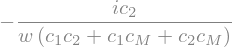

In [49]:
# T-model equivalent c'_1
Zp_1 = ((1/(w*I))**2)*((1/c_1)*(1/c_M))/com_D
simplify(Zp_1)

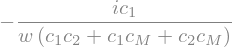

In [21]:
# T-model equivalent c'_2
Zp_2 = ((1/(w*I))**2)*((1/c_2)*(1/c_M))/com_D
simplify(Zp_2)

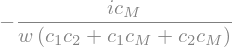

In [22]:
# T-model equivalent c'_M
Zp_M = ((1/(w*I))**2)*((1/c_1)*(1/c_2))/com_D
simplify(Zp_M)

## $T$-Model:

In [23]:
# Define the symbolic variables

# Capacitance
cp_1, cp_2, cp_M = symbols('cp_1 cp_2 cp_M', real = True)

In [24]:
# Common numerator
com_N = ((1/(w*I))**2)*((1/(cp_1*cp_M)) + (1/(cp_1*cp_2)) + (1/(cp_M*cp_2)))

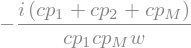

In [25]:
# Pi-model equivalent c_1
Z_1 = (com_N)/(1/(w*cp_2*I))
simplify(Z_1)

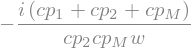

In [26]:
# Pi-model equivalent c_2
Z_2 = (com_N)/(1/(w*cp_1*I))
simplify(Z_2)

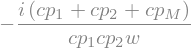

In [27]:
# Pi-model equivalent c_M
Z_M = (com_N)/(1/(w*cp_M*I))
simplify(Z_M)